<h3><center>Árvore de Decisão 🌳</center></h3>

<h5>Grupo: TechMovee</h5>
<h5>Modelo: DecisionTree</h5>
<h5>Autor: Melissa Martins de Araujo - 2°G - n°14</h5>

<h4>Importações</h4>

In [2019]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Lendo a Base</h4>

In [2020]:
# Carregando os dados de um arquivo Excel
data = pd.read_excel('C:\\Users\\melissamartins-ieg\\OneDrive - Instituto Germinare\\Interdisciplinar\\AD_MAT3 - Interdisciplinar\\ExpansaoDados\\pesquisa_responsaveis_expandida.xlsx')
data.head()

,Qual é a idade do(s) seu(s) filho(s)?,Qual é a distância entre sua casa e a escola?,"Quanto tempo você leva, em média, para levar seu(s) filho(s) à escola?",Você possui carro próprio?,Já fez uso do serviço de um transporte escolar para o(s) seu(s) filho(s)?,Você já teve problemas com transporte escolar?,Você estaria disposto a mudar o transporte do seu(s) filho(s) para uma van escolar que oferecesse mais segurança e eficiência?,Você tem ou já teve dificuldade para encontrar transporte escolar para o seu(s) filho(s)?,Você já teve problemas com horário e comunicação com o transportador?,Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?
0,6 - 10 anos,Menos de 1 km,21 - 30 minutos,Sim,Já e ainda uso,Não,Sim,Não,Não,Sim
1,6 - 10 anos,Menos de 1 km,21 - 30 minutos,Sim,Já e ainda uso,Não,Não,Sim,As vezes,Sim
2,6 - 10 anos,Menos de 1 km,Mais de 30 minutos,Sim,"Já, mas não uso mais",Sim,Sim,Sim,As vezes,Sim
3,6 - 10 anos,Menos de 1 km,10 - 20 minutos,Não,Já e ainda uso,Não,Não,Sim,Sim,Sim
4,15 - 18 anos,5 - 9 km,21 - 30 minutos,Sim,Já e ainda uso,Não,Não,Não,Não,Sim


<h4>Separando em Atributo e Resposta</h4>

In [2021]:
# Separando as variáveis independentes e dependentes
X = data.drop(columns=['Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?','Qual é a idade do(s) seu(s) filho(s)?','Você possui carro próprio?','Você tem ou já teve dificuldade para encontrar transporte escolar para o seu(s) filho(s)?'])
y = data['Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?']


<h4>Criando Pré-processador</h4>

In [2022]:
# Definindo o ColumnTransformer
preprocessador = ColumnTransformer(
    transformers=[
        ('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=object)),
        ('numericas', StandardScaler(), make_column_selector(dtype_include=['float64', 'int64']))  # Ajuste aqui para suas colunas numéricas
    ],
    remainder='passthrough'
)

X_pre = preprocessador.fit_transform(X) # Aplicando o Label Enconding

In [2023]:
# Convertendo a matriz transformada de volta para DataFrame
X = pd.DataFrame(X_pre, columns = X.columns)

<h4>Iniciando o Classificador</h4>

In [2024]:
# Criando o classificador de árvore de decisão
classificador_arvore = DecisionTreeClassifier()

<h4>Criando a pipeline com os processos</h4>

In [2025]:
# Criando o pipeline
modelo_pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('classificador', classificador_arvore)
])

<h4>Separação Treino e Teste</h4>

In [2026]:
# Dividindo os dados em conjuntos de treino e teste com um random_state fixo
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=42)

print(f'Linhas de treino: {X_treino.shape[0]}\nLinhas de teste: {X_teste.shape[0]}')

Linhas de treino: 225
Linhas de teste: 75


<h4>SMOTE</h4>

In [2027]:
# Aplicando o SMOTE manualmente no conjunto de treino
smote = SMOTE(random_state=42)
X_treino, y_treino = smote.fit_resample(X_treino, y_treino)

<h4>GridSearchCV</h4>

In [2028]:
# Definindo os parâmetros para o GridSearchCV
parametros = {
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__splitter': ['best', 'random'],
    'classificador__max_depth': [None, 2, 4, 6, 8, 10, 12],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__max_features': [None, 'sqrt', 'log2'],
    'classificador__min_samples_leaf': [1, 2, 5, 10]
}

# Criando o GridSearchCV
grid_search = GridSearchCV(estimator=modelo_pipeline, param_grid=parametros, scoring='accuracy', cv=5)

<h4>Criando e Testando o Modelo</h4>

In [2031]:
# Treinando o modelo com o GridSearchCV
grid_search.fit(X_treino, y_treino)

# Obtendo o melhor modelo
melhor_modelo = grid_search.best_estimator_

In [2032]:
# Fazendo previsões com o conjunto de teste
y_pred = melhor_modelo.predict(X_teste)

<h3><center>Métricas</center></h3>

In [2033]:
# Avaliação do modelo
print("Métricas de avaliação no conjunto de teste:")
print(f'Acurácia: {round((accuracy_score(y_teste, y_pred) * 100), 2)}%')
print(f'F1-Score: {round((f1_score(y_teste, y_pred, average="weighted") * 100), 2)}%')
print(f'Precisão: {round((precision_score(y_teste, y_pred, average="weighted") * 100), 2)}%')
print(f'{classification_report(y_teste, y_pred)}\n')

Métricas de avaliação no conjunto de teste:
Acurácia: 57.33%
F1-Score: 57.1%
Precisão: 57.62%
              precision    recall  f1-score   support

         Não       0.59      0.50      0.54        38
         Sim       0.56      0.65      0.60        37

    accuracy                           0.57        75
   macro avg       0.58      0.57      0.57        75
weighted avg       0.58      0.57      0.57        75




In [2034]:
class_names = y.unique()

<h4>Matriz de Confusão</h4>

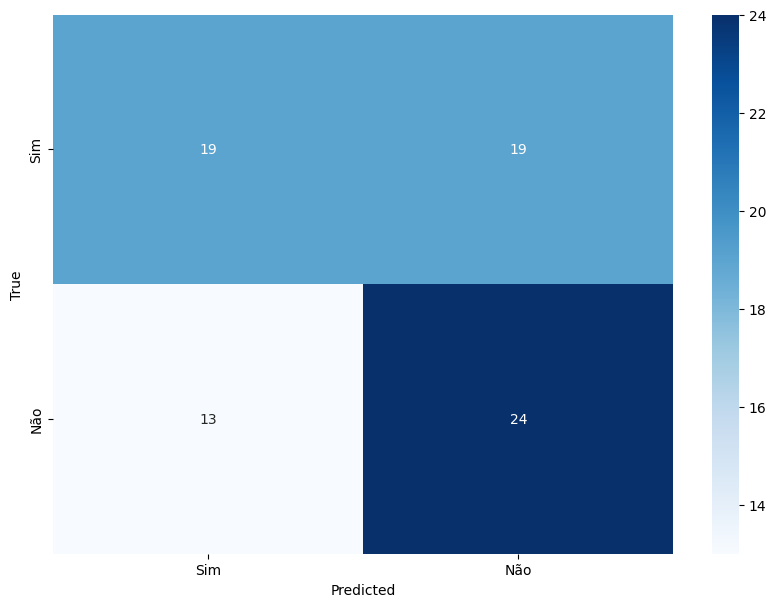

In [2035]:
class_names = y.unique()

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_teste, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<h4>Serialização</h4>

In [ ]:
# Serializando o modelo treinado em um arquivo
with open('modelo_serializado.pkl', 'wb') as arquivo:
    pickle.dump(modelo_pipeline, arquivo)